In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [6]:
# # View all of the classes that automap found
# Base.classes.keys()
#

['measurement', 'station']

In [7]:
# from sqlalchemy import inspect

# # Specify the table name
# table_name = 'measurement'  # Replace 'your_table_name' with the actual table name

# # Get the inspector
# inspector = inspect(engine)

# # Get the columns for the specified table
# columns = inspector.get_columns(table_name)

# # Print column names and data types
# for column in columns:
#     print(column['name'], column['type'])

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [49]:
# Display the first row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1bb7dae3b20>,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

In [50]:
# Display the first row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1bb7dae1360>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08}

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent_date_row = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
print(most_recent_date_row)
print( type(most_recent_date_row) ) 

('2017-08-23',)
<class 'sqlalchemy.engine.row.Row'>


In [13]:
# # Find the most recent date in the data set.
#

In [14]:
# print( type(most_recent_date) )

In [15]:
# print( type(most_recent_date.date) )

In [16]:
most_recent_date_string = most_recent_date_row.date
print(most_recent_date_string)
print( type(most_recent_date_string) ) 

2017-08-23
<class 'str'>


In [17]:
from datetime import datetime

# Parse the string into a datetime object
# most_recent_date = datetime.strptime(most_recent_date_string, "%Y-%m-%d")
most_recent_date = datetime.strptime(most_recent_date_string, "%Y-%m-%d")
print(most_recent_date)
print( type(most_recent_date) ) 

2017-08-23 00:00:00
<class 'datetime.datetime'>


In [18]:

one_year_earlier = most_recent_date - relativedelta(years=1)
print(one_year_earlier)
print( type(one_year_earlier) ) 

2016-08-23 00:00:00
<class 'datetime.datetime'>


In [19]:
# Convert the datetime object to a string in the format "%Y-%m-%d"
one_year_earlier_string = one_year_earlier.strftime("%Y-%m-%d")
print(one_year_earlier_string)
print( type(one_year_earlier_string) )

2016-08-23
<class 'str'>


In [20]:
# ##################################


# most_recent_date_row = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
# print(most_recent_date_row)
# print( type(most_recent_date_row) ) 

# ##################################

In [21]:
# # Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# # Starting from the most recent data point in the database. 

# # Calculate the date one year from the last date in data set.


# # Perform a query to retrieve the data and precipitation scores

# # Find all of the dates great than `2011-03-01`                 ######   ">" ... or ... ">="   ##########
# measurements = session.query(Measurement).\
#     filter(Measurement.date >= one_year_earlier).\
#     order_by(Measurement.date).\
#     all()


        
# # Save the query results as a Pandas DataFrame. Explicitly set the column names


# # Sort the dataframe by date


# # Use Pandas Plotting with Matplotlib to plot the data


In [22]:
# for measurement in measurements:
#     # print(measurement.date, measurement.value)
#     print(measurement.id, measurement.date, measurement.tobs, measurement.prcp, measurement.station)
    

In [24]:
# # Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# # Starting from the most recent data point in the database. 

# # Calculate the date one year from the last date in data set.


# # Perform a query to retrieve the data and precipitation scores

# Find all of the dates great than `2011-03-01`                 ######   ">" ... or ... ">="   ##########
# measurements = session.query(Measurement).\
#     filter(Measurement.date >= one_year_earlier_string).\
#     order_by(Measurement.date).\
#     all()

# measurements = session.query(Measurement.prcp, Measurement.date).\
#     filter(Measurement.date >= one_year_earlier_string).\
#     group_by(Measurement.date).\
#     order_by(Measurement.date).\
#     all()

# measurements = session.query(Measurement.prcp, Measurement.date).\
#     filter(Measurement.date >= one_year_earlier_string).\
#     group_by(Measurement.date).\
#     all()

measurements = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date >= one_year_earlier_string).\
    all()

measurements



# # Combined query to find all records with the calculated date or more recent
# measurements2 = session.query(Measurement).\
#     filter(Measurement.date >= (\
#                                     session.query(func.max(Measurement.date)).scalar() - relativedelta(years=1)\
#                                )\
#           ).\
#     order_by(Measurement.date).\
#     all()

        
# # Save the query results as a Pandas DataFrame. Explicitly set the column names


# # Sort the dataframe by date


# # Use Pandas Plotting with Matplotlib to plot the data


[(0.0, '2016-08-23'),
 (0.08, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.13, '2016-08-31'),
 (0.0, '2016-09-01'),
 (0.0, '2016-09-02'),
 (0.0, '2016-09-03'),
 (0.03, '2016-09-04'),
 (None, '2016-09-05'),
 (None, '2016-09-06'),
 (0.05, '2016-09-07'),
 (0.0, '2016-09-08'),
 (0.03, '2016-09-09'),
 (0.0, '2016-09-10'),
 (0.05, '2016-09-11'),
 (0.0, '2016-09-12'),
 (0.02, '2016-09-13'),
 (1.32, '2016-09-14'),
 (0.42, '2016-09-15'),
 (0.06, '2016-09-16'),
 (0.05, '2016-09-17'),
 (0.0, '2016-09-18'),
 (0.0, '2016-09-19'),
 (0.0, '2016-09-20'),
 (0.0, '2016-09-21'),
 (0.02, '2016-09-22'),
 (0.0, '2016-09-23'),
 (0.0, '2016-09-24'),
 (0.0, '2016-09-25'),
 (0.06, '2016-09-26'),
 (0.02, '2016-09-27'),
 (0.0, '2016-09-28'),
 (0.0, '2016-09-29'),
 (0.0, '2016-09-30'),
 (0.0, '2016-10-01'),
 (0.0, '2016-10-02'),
 (0.0, '2016-10-03'),
 (0.0, '2016-10-04'),
 (0.0, '2016-10-05'),
 (0.0, '2016-1

In [64]:
# for measurement in measurements:
#     # print(measurement.date, measurement.value)
#     print(measurement.id, measurement.date, measurement.tobs, measurement.prcp, measurement.station)

# measurements

In [25]:

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(measurements, columns=['Precipitation','Date'])
print (df)
# df_sorted = df.sort_values(by='date', ascending=False)
# print (df_sorted)

df_sorted = df.sort_values(by='Date', ascending=True)
print (df_sorted)

      Precipitation        Date
0              0.00  2016-08-23
1              0.08  2016-08-24
2              0.08  2016-08-25
3              0.00  2016-08-26
4              0.00  2016-08-27
...             ...         ...
2225           0.09  2017-08-19
2226            NaN  2017-08-20
2227           0.56  2017-08-21
2228           0.50  2017-08-22
2229           0.45  2017-08-23

[2230 rows x 2 columns]
      Precipitation        Date
0              0.00  2016-08-23
1009            NaN  2016-08-23
1529           1.79  2016-08-23
704            0.05  2016-08-23
361            0.15  2016-08-23
...             ...         ...
1527           0.00  2017-08-22
1008           0.00  2017-08-23
360            0.00  2017-08-23
1528           0.08  2017-08-23
2229           0.45  2017-08-23

[2230 rows x 2 columns]


In [26]:
# # Convert the results to a list of dictionaries
# # data = [
# #     {"id": measurement.id, "date": measurement.date, "tobs": measurement.tobs, "prcp": measurement.prcp, "station": measurement.station}
# #     for measurement in measurements
# # ]

# data = [
#     {"date": measurement.date, "prcp": measurement.prcp}
#     for measurement in measurements
# ]

# # Create a DataFrame from the list of dictionaries
# df = pd.DataFrame(data)
# print (df)

# # df_sorted = df.sort_values(by='date', ascending=False)
# # print (df_sorted)

# df_sorted = df.sort_values(by='date', ascending=True)
# print (df_sorted)

In [ ]:
df = pd.DataFrame(measurements, columns=['Precipitation','Date'])
print (df)
# df_sorted = df.sort_values(by='date', ascending=False)
# print (df_sorted)

df_sorted = df.sort_values(by='Date', ascending=True)
print (df_sorted)

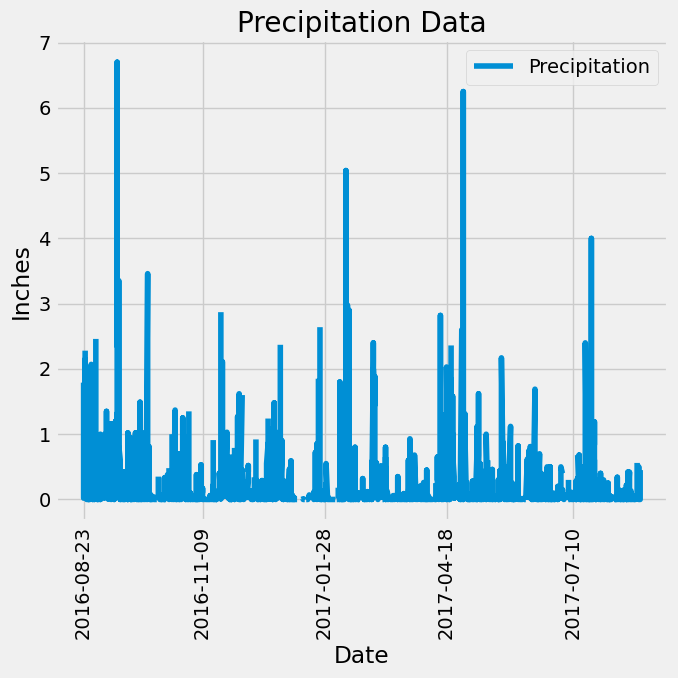

In [48]:

df_sorted["Date"]=pd.to_datetime(df_sorted["Date"])

#custom_dates = ["2016-08-23", "2016-10-01", "2016-11-09", "2016-12-19", "2017-01-28", "2017-03-09", "2017-04-18", "2017-05-31", "2017-07-10"]
custom_dates = ["2016-08-23", "2016-11-09", "2017-01-28", "2017-04-18", "2017-07-10"]

plt.figure(figsize=(7,7))
plt.plot(df_sorted['Date'], df_sorted['Precipitation'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation Data')
plt.xticks(custom_dates, rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()


In [40]:
summary_statistics = df_sorted.describe()

print(summary_statistics)


       Precipitation                           Date
count    2021.000000                           2230
mean        0.177279  2017-02-16 05:31:15.874439424
min         0.000000            2016-08-23 00:00:00
25%         0.000000            2016-11-18 00:00:00
50%         0.020000            2017-02-14 12:00:00
75%         0.130000            2017-05-17 00:00:00
max         6.700000            2017-08-23 00:00:00
std         0.461190                            NaN


Text(0, 0.5, 'Inches')

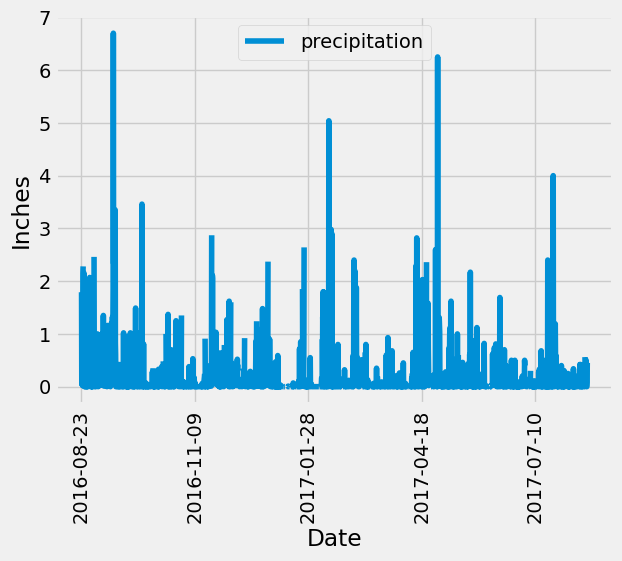

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [58]:
stations = session.query(Station.id, Station.station).\
    all()

stations

[(1, 'USC00519397'),
 (2, 'USC00513117'),
 (3, 'USC00514830'),
 (4, 'USC00517948'),
 (5, 'USC00518838'),
 (6, 'USC00519523'),
 (7, 'USC00519281'),
 (8, 'USC00511918'),
 (9, 'USC00516128')]

In [59]:
stations = session.query(Station).count()
stations

9

In [57]:
# Design a query to calculate the total number of stations in the dataset
station_count_row = session.query(Station.station).group_by(Station.station).count()
#station_count_row = session.query(func.count(Station.station)).scalar()
print(station_count_row)
print( type(station_count_row) ) 

9
<class 'int'>


In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [64]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_activity = session.query(Measurement.station,\
    func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc())\
    .all()

for station, count in station_activity:
    print(f"{station},{count}")


USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

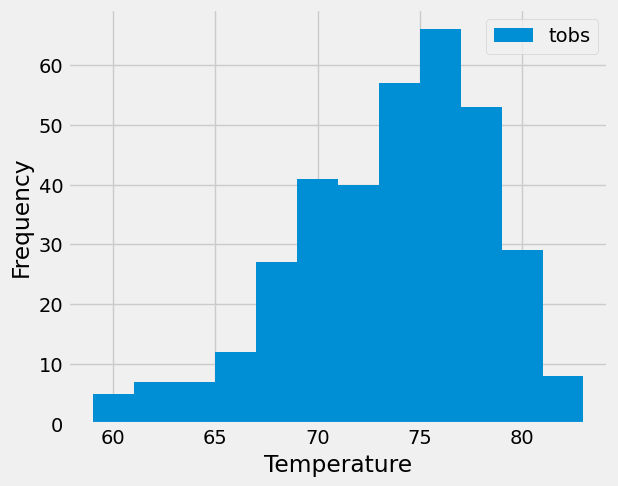

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()